In [1]:
import numpy as np
import matplotlib.pyplot as plt
from warnings import warn
%matplotlib notebook

neighbourhood = [4, 2, 1]
Nplayers = 100
Start_rat = 1000
Ngames = 1000000
K = 30
Lam = np.log(10) / 400

skill = np.random.rand(Nplayers) * 2 * Start_rat
skill = np.array(np.round(skill * Start_rat / skill.mean()), dtype=int)
rem = skill.sum() - Nplayers * Start_rat
inc = 1
if rem > 0:
    inc = -1
rem = abs(rem)
for i in range(rem):
    skill[i] += inc
skill = np.sort(skill)
rating = np.full((Nplayers), 1000, dtype=int)
diff = np.sqrt(((skill - rating) ** 2).mean())

In [2]:
def Random_Matchmaking(Ngames, Nplayers, Lam, K, skill, freq=10000):
    skill = np.sort(skill)
    rating = np.full((Nplayers), skill.mean())
    diff = np.sqrt(((skill - rating) ** 2).mean())
    
    fig, ax = plt.subplots()
    for k in range(Ngames):
        i = np.random.randint(Nplayers)
        j = np.random.randint(Nplayers - 1)
        if i == j:
            j = Nplayers - 1

        p = 1 / (1 + np.exp(Lam * (skill[j] - skill[i])))
        E = 1 / (1 + np.exp(Lam * (rating[j] - rating[i])))
        if np.random.rand() < p:
            change = K * (1 - E)
        else:
            change = K * E
            i, j = j, i
        rating[i] += change
        rating[j] -= change

        if (k + 1) % freq == 0:
            diff = np.append(diff, np.sqrt(((skill - rating) ** 2).mean()))
            ax.clear()
            ax.plot((np.arange(diff.size) + 1) * freq, diff)
            ax.set_ylim(bottom=0, top=None)
            fig.canvas.draw()

In [3]:
def Neighbour_Matchmaking(Ngames, Nplayers, Lam, K, skill, neighbourhood, freq=10000):
    skill = np.sort(skill)
    rating = np.full((Nplayers), skill.mean())
    diff = np.sqrt(((skill - rating) ** 2).mean())
    neigh_zero = len(neighbourhood)
    neighbourhood = np.concatenate((np.flip(neighbourhood), [0], neighbourhood)).cumsum()
    
    fig, ax = plt.subplots()
    for k in range(Ngames):
        i = np.random.randint(Nplayers)
        j = Nplayers
        while (j < 0) or (j >= Nplayers):
            z = 0
            r = np.random.randint(neighbourhood[-1])
            while r >= neighbourhood[z]:
                z += 1
            j = i + z - neigh_zero
        
        p = 1 / (1 + np.exp(Lam * (skill[j] - skill[i])))
        E = 1 / (1 + np.exp(Lam * (rating[j] - rating[i])))
        if np.random.rand() < p:
            change = K * (1 - E)
        else:
            change = K * E
            i, j = j, i
        rating[i] += change
        rating[j] -= change
        while (i+1 < Nplayers) and (rating[i] > rating[i+1]):
            rating[i], rating[i+1] = rating[i+1], rating[i]
            skill[i], skill[i+1] = skill[i+1], skill[i]
            i += 1
        if (j > 0) and (rating[j-1] > rating[j]):
            rating[j-1], rating[j] = rating[j], rating[j-1]
            skill[j-1], skill[j] = skill[j], skill[j-1]
        j -= 1
        while (j > 0) and (rating[j-1] > rating[j]):
            rating[j-1], rating[j] = rating[j], rating[j-1]
            skill[j-1], skill[j] = skill[j], skill[j-1]
            j -= 1

        if (k + 1) % freq == 0:
            diff = np.append(diff, np.sqrt(((skill - rating) ** 2).mean()))
            ax.clear()
            ax.plot((np.arange(diff.size) + 1) * freq, diff)
            ax.set_ylim(bottom=0, top=None)
            fig.canvas.draw()

In [4]:
def Group_Matchmaking(Ntourn, Nplayers, group_size, group_shift, skill, freq=1000, random=True):
    assert group_size > group_shift and group_shift > 0, "Given grouping is invalid"
    if (Nplayers - group_size) % group_shift:
        warn("The last group won't be aligned")
    
    rating = np.full((Nplayers), sum(skill) / len(skill))
    diff = np.sqrt(((skill - rating) ** 2).mean())
    group_start = [0]
    while group_start[-1] < Nplayers - group_size:
        group_start.append(group_start[-1] + group_shift)
    group_start[-1] = Nplayers - group_size
    Ngroups = len(group_start)
    
    fig, ax = plt.subplots()
    i_group = Ngroups - 1
    for k in range(Ntourn):
        if random:
            i_group = np.random.randint(Ngroups)
        else:
            i_group = (i_group + 1) % Ngroups
        start = group_start[i_group]
        end = start + group_size
        ski_rat_diff = (rating[start:end].sum() - skill[start:end].sum()) / group_size
        rating[start:end] = skill[start:end] + ski_rat_diff
        
        if (k + 1) % freq == 0:
            diff = np.append(diff, np.sqrt(((skill - rating) ** 2).mean()))
            ax.clear()
            ax.plot((np.arange(diff.size) + 1) * freq, diff)
            ax.set_ylim(bottom=0, top=None)
            fig.canvas.draw()

<IPython.core.display.Javascript object>


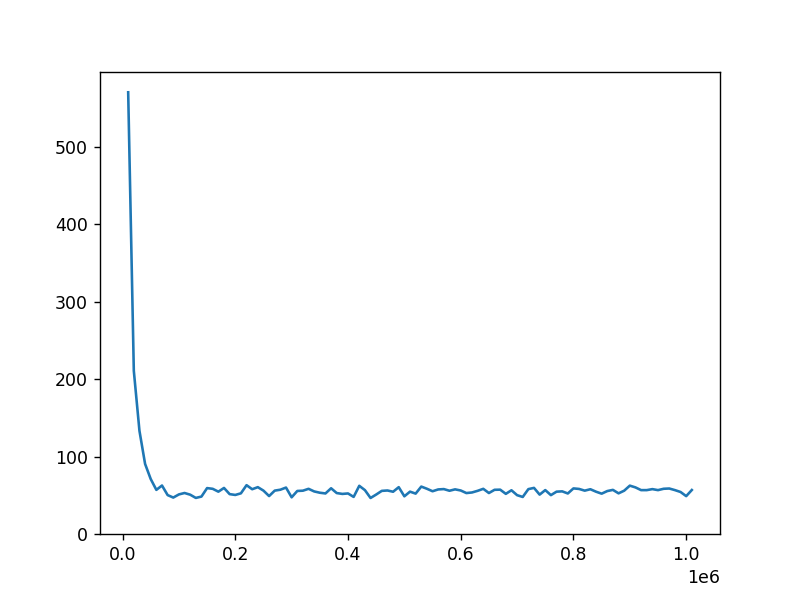

In [5]:
Random_Matchmaking(Ngames, Nplayers, Lam, K, skill)

<IPython.core.display.Javascript object>


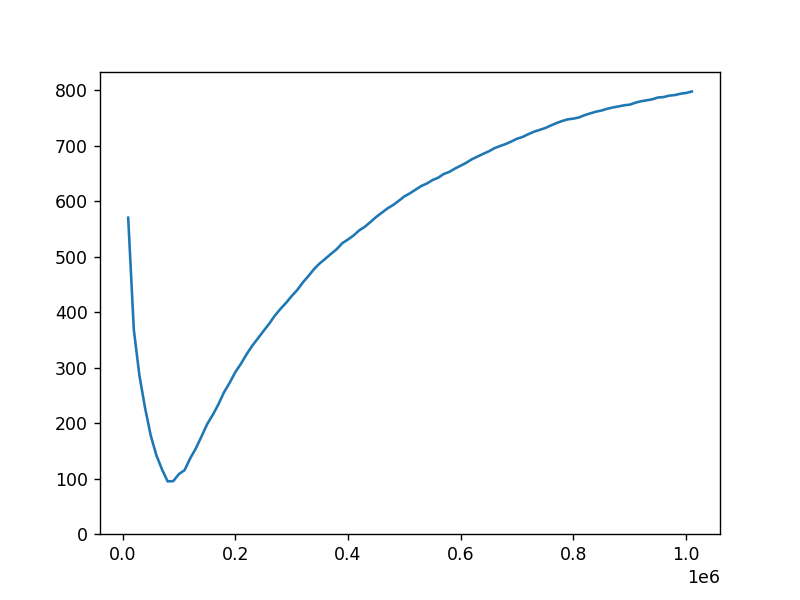

In [6]:
Neighbour_Matchmaking(Ngames, Nplayers, Lam, K, skill, neighbourhood)

<IPython.core.display.Javascript object>


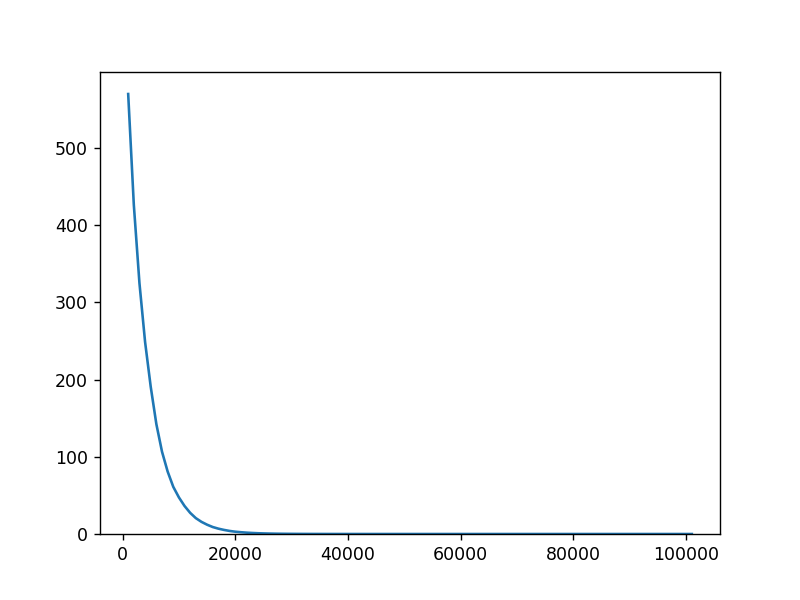

In [7]:
Group_Matchmaking(100000, Nplayers, 7, 3, skill)